# Daily Challenge: Building Your First Neural Network on the MNIST Dataset

What You Need to Do

1. Load and Preprocess the MNIST Dataset

    - Load the MNIST dataset using TensorFlow/Keras
    - Normalize the image pixel values to be between 0 and 1
    - Convert labels into one-hot encoded format
    - Split the dataset into training and test sets
    - Display sample images with their corresponding labels
    

2. Build a Fully Connected Neural Network

    - Define a sequential model using Keras
    - Flatten the 28x28 input images into a single vector
    - Add two hidden layers with ReLU activation
    - Add an output layer with Softmax activation for multi-class classification
    - Compile the model using categorical cross-entropy as the loss function and accuracy as the evaluation metric
    

3. Train the Neural Network

    - Fit the model to the training data for 10 epochs
    - Use a validation set to track performance during training
    - Observe the loss and accuracy trends over the epochs


4. Evaluate the Model’s Performance

    - Compute accuracy on the test dataset
    - Display a confusion matrix for misclassified digits
    - Identify which digits the model struggles with the most

_____________

Load the MNIST dataset using TensorFlow/Keras

In [11]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

Split the dataset into training and test sets

In [2]:
(x_train_data, y_train_data), (x_val_data, y_val_data) = mnist.load_data()

- `x_train_data` contains 60,000 training images, each of size 28x28 pixels.
- `y_train_data` contains the labels (0-9) for the training images.
- `x_val_data` contains 10,000 test images, and `y_val_data` contains their labels.
Each label corresponds to a specific type of clothing, such as “T-shirt” or “Sneaker.”


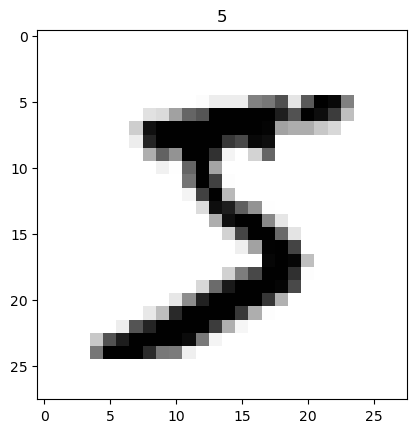

In [3]:
plt.imshow(x_train_data[0], cmap=plt.cm.binary)
plt.title(y_train_data[0])
plt.show()

Normalize the image pixel values to be between 0 and 1 and convert labels into one-hot encoded format

In [4]:
def preprocessing_function(x_new, y_new):
  x_new = tf.cast(x_new, tf.float32) / 255.0  # Normalize pixel values
  y_new = tf.cast(y_new, tf.int64)            # Convert labels to integers
  return x_new, y_new

def func_creating_dataset(xs_data, ys_data, num_classes=10):
  ys_data = tf.one_hot(ys_data, depth=num_classes)  # One-hot encode labels
  return tf.data.Dataset.from_tensor_slices((xs_data, ys_data)) \
    .map(preprocessing_function) \
    .shuffle(buffer_size=1000) \
    .batch(32)

x_train_data, y_train_data = preprocessing_function(x_train_data, y_train_data)
x_val_data, y_val_data = preprocessing_function(x_val_data, y_val_data)
dataset_training = func_creating_dataset(x_train_data, y_train_data)
dataset_val = func_creating_dataset(x_val_data, y_val_data)

Define a sequential model using Keras, flatten the 28x28 input images into a single vector, add two hidden layers with ReLU activation and add an output layer with Softmax activation for multi-class classification.
 

In [5]:
My_model = keras.Sequential([
    keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),  # Flatten the input
    keras.layers.Dense(units=256, activation='relu'),                    # Hidden layer 1 : A layer with 256 neurons and the ReLU activation function.
    keras.layers.Dense(units=192, activation='relu'),                    # Hidden layer 2
    keras.layers.Dense(units=10, activation='softmax')                   # Output layer :  Outputs 10 probabilities (one for each class).
])

Compile the model using categorical cross-entropy as the loss function and accuracy as the evaluation metric.


In [7]:
My_model.compile(optimizer='adam', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Fit the model to the training data for 10 epochs, use a validation set to track performance during training, observe the loss and accuracy trends over the epochs.


In [8]:
history = My_model.fit(
    dataset_training.repeat(), 
    epochs=10, 
    steps_per_epoch=500,
    validation_data=dataset_val.repeat(), 
    validation_steps=2
)

Epoch 1/10


C:\Users\julie\Anaconda3\lib\site-packages\keras\backend.py:5535: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits, "Softmax", "categorical_crossentropy"


500/500 [==============================] - 3s 4ms/step - loss: 1.1839 - accuracy: 0.6556 - val_loss: 0.6593 - val_accuracy: 0.8281
Epoch 2/10
500/500 [==============================] - 2s 3ms/step - loss: 0.5344 - accuracy: 0.8431 - val_loss: 0.5005 - val_accuracy: 0.8438
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 0.4134 - accuracy: 0.8773 - val_loss: 0.3675 - val_accuracy: 0.8906
Epoch 4/10
500/500 [==============================] - 2s 3ms/step - loss: 0.3494 - accuracy: 0.8984 - val_loss: 0.3463 - val_accuracy: 0.9062
Epoch 5/10
500/500 [==============================] - 2s 3ms/step - loss: 0.3484 - accuracy: 0.8976 - val_loss: 0.4219 - val_accuracy: 0.8750
Epoch 6/10
500/500 [==============================] - 2s 3ms/step - loss: 0.3199 - accuracy: 0.9059 - val_loss: 0.4708 - val_accuracy: 0.8594
Epoch 7/10
500/500 [==============================] - 2s 3ms/step - loss: 0.3190 - accuracy: 0.9038 - val_loss: 0.2948 - val_accuracy: 0.9219
Epoch 8/10
500/50

Compute accuracy on the test dataset

In [9]:
Make_predictions = My_model.predict(dataset_val)
print(Make_predictions)

313/313 [==============================] - 1s 2ms/step
[[1.48356357e-05 3.99470323e-09 3.51476803e-04 ... 2.44611128e-05
  2.25969023e-04 2.29149568e-03]
 [6.42351527e-03 2.63510938e-05 1.41715985e-02 ... 3.26392842e-06
  6.54495060e-01 7.14791997e-04]
 [9.58993554e-01 2.72348558e-07 1.48496905e-03 ... 1.06833984e-04
  8.80853564e-04 4.84181714e-04]
 ...
 [1.74685265e-04 3.12191878e-06 6.60300066e-05 ... 9.91349816e-01
  1.73732205e-05 5.17698238e-03]
 [1.47777796e-03 6.20511798e-07 7.68477321e-02 ... 1.80962889e-08
  9.67803353e-04 2.88264808e-08]
 [1.54553866e-03 1.70994292e-06 8.44745398e-01 ... 2.11998622e-06
  4.60558658e-04 7.30187423e-07]]


In [10]:
test_loss, test_accuracy = My_model.evaluate(dataset_val)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2483 - accuracy: 0.9278
Test Accuracy: 0.93


313/313 [==============================] - 1s 4ms/step


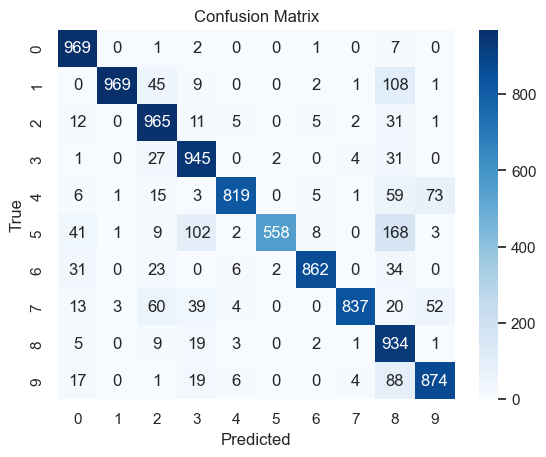

In [23]:
from sklearn.metrics import confusion_matrix

y_pred = My_model.predict(x_val_data)
y_pred_classes = np.argmax(y_pred, axis=1)  


cm = confusion_matrix(y_val_data, y_pred_classes)


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


The model had the most issues with numbers 5 and 8. Many times it predicted number 8 when the true number was 5 or 1 and many times, it failed to recognize number 5 and instead predicted number 3 or 8.